# Subir archivos a colab

In [2]:
from google.colab import files

uploaded = files.upload()
file_uploaded=None
for fn in uploaded.keys():
  file_uploaded=uploaded[fn]
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Logotipo_de_la_Universidad_Nacional_de_Colombia.svg.png to Logotipo_de_la_Universidad_Nacional_de_Colombia.svg.png
User uploaded file "Logotipo_de_la_Universidad_Nacional_de_Colombia.svg.png" with length 57217 bytes


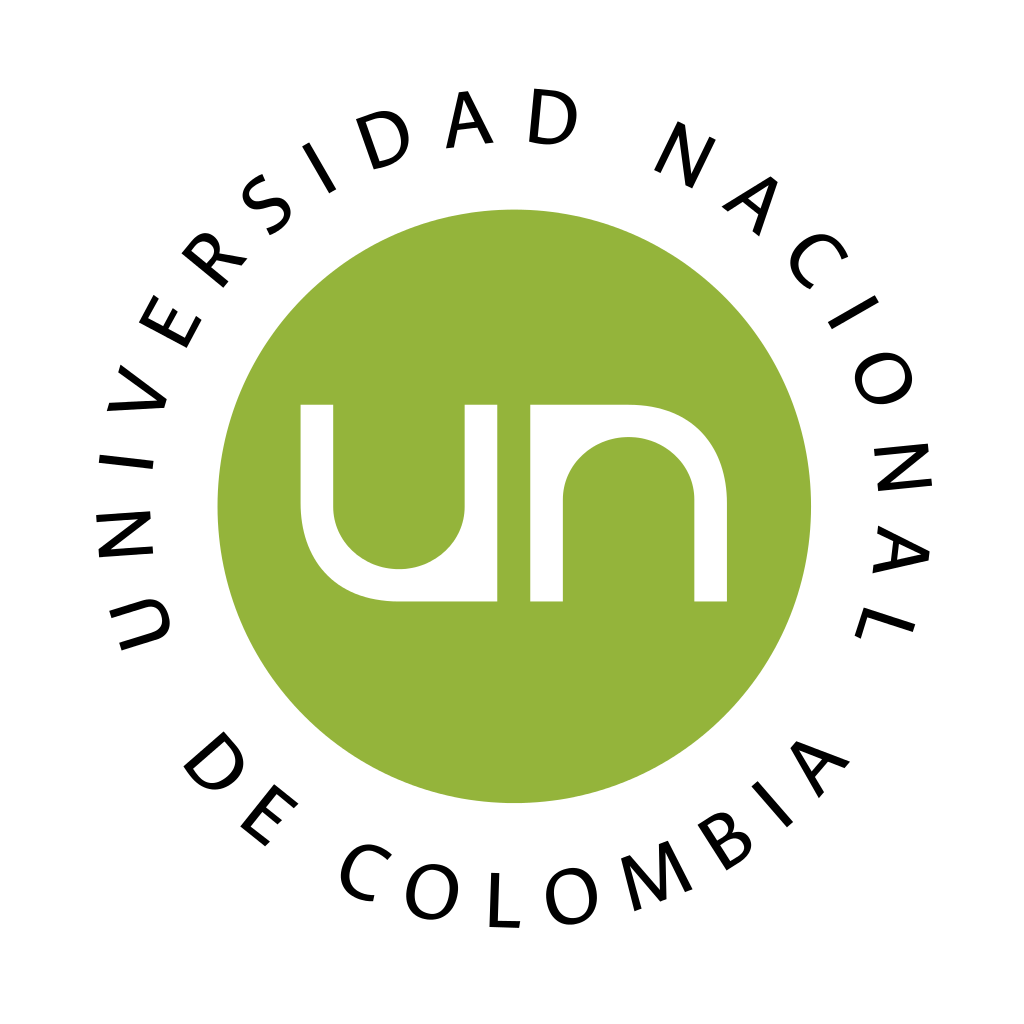

In [67]:
from IPython.display import Image, display
display(Image(file_uploaded))


# Bytes representation

In [68]:
file_uploaded

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x06\x00\x00\x00\x7f\x1d+\x83\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw\xb8\x1cU\xc1\xc7\xf1\xef\xecM%\xa1IB\x91\xdeAP\xe9H\x120H\x15\x12T\x04\xa4\xc9+\x16\x90\x12\x10DQQ\xb9X\x10AT \x01\x02"EE\r\xa8@\n\xbd\x13P \xa0 `\xa5#]z\xfa\xddy\xff8\x89\x84pwfw\xef\xce\xcc\x96\xef\xe7y\xe6A3\xe5\xfcf\x03\xbbs\xce\x9c\x02\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x

In [69]:
!pip install pycryptodome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from Crypto.Cipher import AES

In [71]:
security_level = "192" #@param ["128", "192", "256"]
key = "hello" #@param {type: "string"}
sec_map={
    "128": 16,
    "192": 24,
    "256": 32,
}
to_cipher = file_uploaded
security_level=sec_map[security_level]

In [72]:
from math import ceil

def process_key():
  letter_times=ceil(security_level/len(key))
  new_key=(key*letter_times)[:security_level]
  return new_key

new_key=process_key()

In [73]:
b = bytearray()
b.extend(map(ord, new_key))

In [77]:
enc = AES.new(b, AES.MODE_EAX)
nonce = enc.nonce

In [78]:
from Crypto.Util.Padding import pad, unpad

In [79]:
padded=pad(to_cipher, 8)
cipher=enc.encrypt(padded)

In [80]:
import base64

In [81]:
encoded64=base64.encodebytes(cipher)
encoded64

b'EgYQxeKkPAim0nfx5Dnn/ebQM3t+/zfbFo6utPOC1ye294b3h6E6azzcI7kRxltr10in8s2ejUke\nc7Wqk+gDh5hC1J9nlojexCODrN3eGEzUuL5Ili5QJQfgTsUrkZVXp6h9yEPo4fh1NkP5JUr20gnP\n7OrDP6gOHYW/kOtKz7mD8qe5DD2j1Beiu0o6aWJvPzKsx76v9zPeh6yzX4g11EVS7mmgPWrLA9tV\nP6E65deAw5i/oFO5UDn0x34jhQjVwX9BVwNPboki2r5HkqeGr5hpZ5WD+OHzUNqLwzcEkRSUYPjQ\nkURt9leQDU047tr+twuJrSOpn3mCxpPJGKRX86coBLhMWCdDYxI7vPT1MBMoS0OIg5081ghi3ssV\nAsNedYhabrNFmctuBgxlbwGDt54UCOaiTtlhOAw5uxjbrOdYU96Bf0XRD0LXRuqweLctosiqY7k0\nU8xpzxJ5vuQHRAnp1Fduw2YbGbIpudMiHhWnl0JWN8IEQy0UHywO3cxuKbVpqoIDlkUNSfVLP1MF\nBQeP2fdvF1qLr6xaD3skj1Y5d0oDCEwvX+HnmkTLpS55fW3N1zBbrt8fyxzCGBPDViYOiTBuW1FP\ni8RbQgtDmbg4jC50lnuXimgDL/hnEy+Ijn64f1ZuPerfFWQz3UUQ4a9N5Y8hGSYmE5lEA2AccwMW\nhkW6uKwdgYeKby6RRXFTF+BTPz+jLsG5O1V0scAEMJAO+VHCN7DznGuywMNOZYPdyL+yLiVQCHiL\ngqrCZlv4sR0vTBODtHeaFni07TMw9VNYrilUNRPVQX7MUiJ+1jHPXRbPqpsekoqwE9vZatJ4MJkp\nqdiHuc22oophEKqx6mDYNQTx12yoqnHAHSmby9mSufjx4QhwdrVh+fv4Fxe+dbJhyXh+I9JnnLFI\n/AH+riuSoGObx2ewM5ISYaWv1D3unVayVAeqvTk2xpq2B6kbdKKkB9XdO21xYP

In [82]:
decoded64=base64.decodebytes(encoded64)
decoded64

b'\x12\x06\x10\xc5\xe2\xa4<\x08\xa6\xd2w\xf1\xe49\xe7\xfd\xe6\xd03{~\xff7\xdb\x16\x8e\xae\xb4\xf3\x82\xd7\'\xb6\xf7\x86\xf7\x87\xa1:k<\xdc#\xb9\x11\xc6[k\xd7H\xa7\xf2\xcd\x9e\x8dI\x1es\xb5\xaa\x93\xe8\x03\x87\x98B\xd4\x9fg\x96\x88\xde\xc4#\x83\xac\xdd\xde\x18L\xd4\xb8\xbeH\x96.P%\x07\xe0N\xc5+\x91\x95W\xa7\xa8}\xc8C\xe8\xe1\xf8u6C\xf9%J\xf6\xd2\t\xcf\xec\xea\xc3?\xa8\x0e\x1d\x85\xbf\x90\xebJ\xcf\xb9\x83\xf2\xa7\xb9\x0c=\xa3\xd4\x17\xa2\xbbJ:ibo?2\xac\xc7\xbe\xaf\xf73\xde\x87\xac\xb3_\x885\xd4ER\xeei\xa0=j\xcb\x03\xdbU?\xa1:\xe5\xd7\x80\xc3\x98\xbf\xa0S\xb9P9\xf4\xc7~#\x85\x08\xd5\xc1\x7fAW\x03On\x89"\xda\xbeG\x92\xa7\x86\xaf\x98ig\x95\x83\xf8\xe1\xf3P\xda\x8b\xc37\x04\x91\x14\x94`\xf8\xd0\x91Dm\xf6W\x90\rM8\xee\xda\xfe\xb7\x0b\x89\xad#\xa9\x9fy\x82\xc6\x93\xc9\x18\xa4W\xf3\xa7(\x04\xb8LX\'Cc\x12;\xbc\xf4\xf50\x13(KC\x88\x83\x9d<\xd6\x08b\xde\xcb\x15\x02\xc3^u\x88Zn\xb3E\x99\xcbn\x06\x0ceo\x01\x83\xb7\x9e\x14\x08\xe6\xa2N\xd9a8\x0c9\xbb\x18\xdb\xac\xe7XS\xde\x81\x7fE\xd1\x0fB\xd7F\xea\x

In [83]:
decoded=AES.new(b, AES.MODE_EAX, nonce=nonce).decrypt(decoded64)
decoded

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x06\x00\x00\x00\x7f\x1d+\x83\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw\xb8\x1cU\xc1\xc7\xf1\xef\xecM%\xa1IB\x91\xdeAP\xe9H\x120H\x15\x12T\x04\xa4\xc9+\x16\x90\x12\x10DQQ\xb9X\x10AT \x01\x02"EE\r\xa8@\n\xbd\x13P \xa0 `\xa5#]z\xfa\xddy\xff8\x89\x84pwfw\xef\xce\xcc\x96\xef\xe7y\xe6A3\xe5\xfcf\x03\xbbs\xce\x9c\x02\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x92$I\x

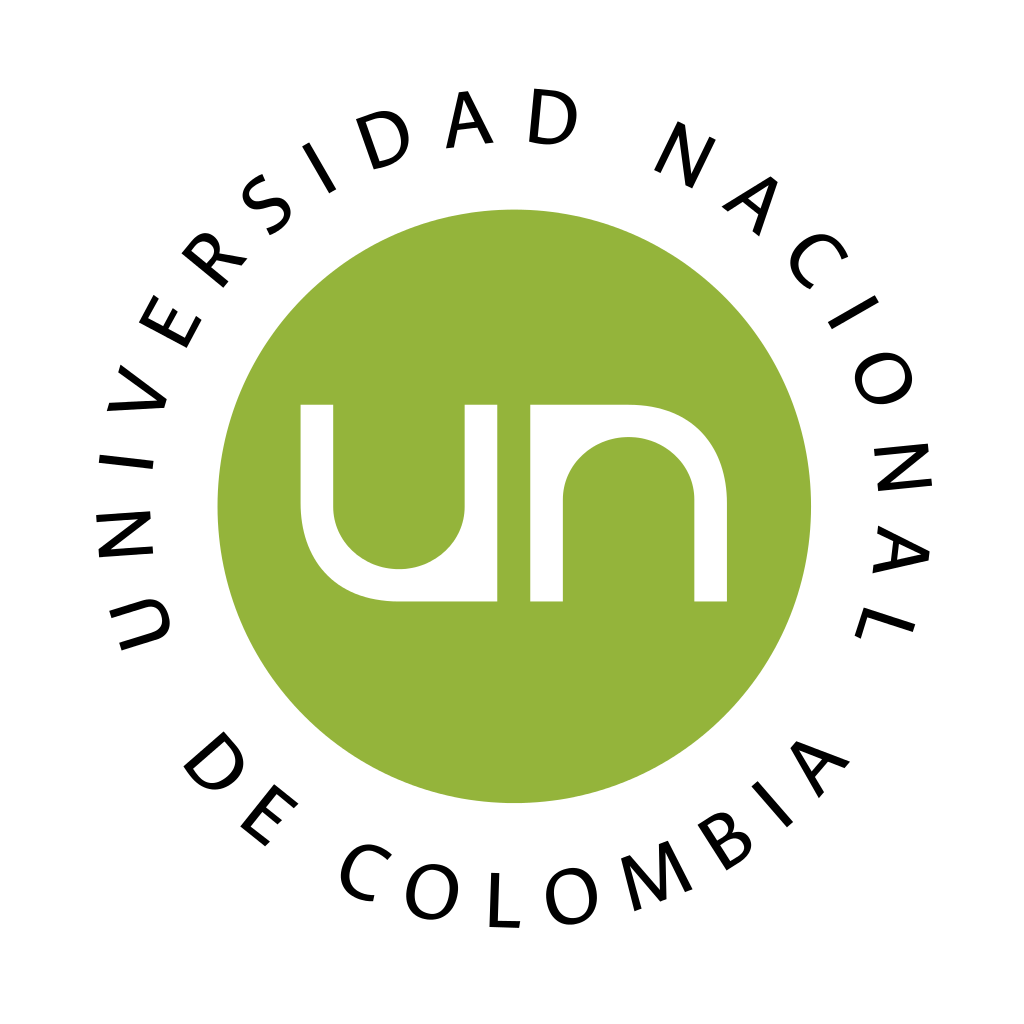

In [84]:
display(Image(decoded))